In [252]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import numpy as np

In [253]:
data = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = data.load_data()



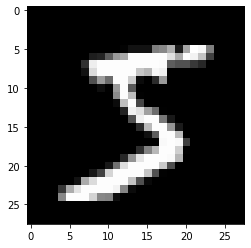

In [254]:
plt.imshow(x_train[0],cmap='gray')
plt.show()


Normalize Data

In [255]:
x_train= x_train/255.0
x_test= x_test/255.0


Encoder


In [256]:
encoder_input = keras.Input(shape=(28,28,1), name='original')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation='relu')(x)


encoder = keras.Model(encoder_input, encoder_output, name='encoder')
   





Decoder


In [257]:
decoder_input = keras.layers.Dense(64, activation='sigmoid')(encoder_output)
x = keras.layers.Dense(784, activation='sigmoid')(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)


decoder = keras.Model(decoder_input, decoder_output, name='decoder')



AutoEncoder


In [258]:
autoencoder = keras.Model(encoder_input, decoder_output, name = 'autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_62 (Dense)            (None, 64)                50240     
                                                                 
 dense_63 (Dense)            (None, 64)                4160      
                                                                 
 dense_64 (Dense)            (None, 784)               50960     
                                                                 
 reshape_18 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
Total params: 105,360
Trainable params: 105,360
Non-tra

In [259]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss ='mse'


autoencoder.compile(optimizer, loss)
autoencoder.fit(x_train, x_train, epochs = 5, batch_size= 32,validation_split=0.1)


Epoch 1/5
1688/1688 [==============================] - 10s 5ms/step - loss: 0.0642 - val_loss: 0.0562
Epoch 2/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0516 - val_loss: 0.0478
Epoch 3/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0464 - val_loss: 0.0447
Epoch 4/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0441 - val_loss: 0.0431
Epoch 5/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0428 - val_loss: 0.0421


1/1 [==============================] - 0s 47ms/step


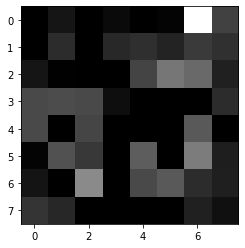

In [260]:
example = encoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
plt.imshow(example.reshape((8,8)), cmap='gray')
plt.show()

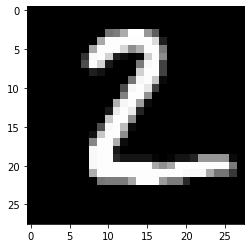

In [261]:
plt.imshow(x_test[1], cmap="gray")

1/1 [==============================] - 0s 66ms/step


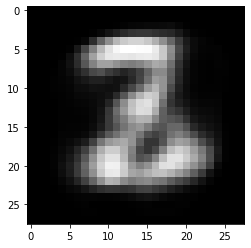

In [262]:
exampleauto = autoencoder.predict([ x_test[1].reshape(-1,28, 28,1)])
plt.imshow(exampleauto.reshape(28,28), cmap="gray")